In [36]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor #modelo random forest y #gradient boosted trees
from sklearn.svm import SVR #support vector regression
from sklearn.linear_model import Ridge,Lasso # regression with regularization: Rigde: is given by the l2-norm. Also known as Ridge Regression
from sklearn.kernel_ridge import KernelRidge #kernel ridge regression
from sklearn import preprocessing # para feature scaling
from sklearn.metrics import mean_squared_error, r2_score #métricas

In [2]:
%matplotlib inline

In [3]:
#import Data por industria
file= 'Dataframe_Exportaciones_mensuales_version2.csv'
datos=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
datos.iloc[:,:]

,Pais_comprador,Industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,2000,Enero,45624927.0
1,América Latina,Industrias Manufactureras,2000,Febrero,38402717.0
2,América Latina,Industrias Manufactureras,2000,Marzo,45714515.0
3,América Latina,Industrias Manufactureras,2000,Abril,53314410.0
4,América Latina,Industrias Manufactureras,2000,Mayo,68750896.0
5,América Latina,Industrias Manufactureras,2000,Junio,67485328.0
6,América Latina,Industrias Manufactureras,2000,Julio,62364404.0
7,América Latina,Industrias Manufactureras,2000,Agosto,60669012.0
8,América Latina,Industrias Manufactureras,2000,Septiembre,65432673.0
9,América Latina,Industrias Manufactureras,2000,Octubre,55449279.0


In [4]:
datos.Mes=datos.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
datos['Año']=datos['Año'].values.astype(np.float)

In [5]:
#reemplazar numeros de años para modificar que los años comienzen en agosto y terminen en julio, así se harán predicciones
#para el último año "17" siendo este agosto2016-julio2017

rows_toreplace=datos[(datos.Año==2000) & (datos.Mes<8)].index.values # filas a reemplazar año 0(enero2000-julio2000)
datos.loc[rows_toreplace,'Año']=0

for año0,año1,i in zip(range(2000,2017),range(2001,2018),range(1,18)):
    rows_toreplace=datos[(datos.Año==año0) & (datos.Mes>7)].index.values # filas a reemplazar del año (agosto-diciembre)
    datos.loc[rows_toreplace,'Año']=i 
    rows_toreplace=datos[(datos.Año==año1) & (datos.Mes<8)].index.values # filas a reemplazar del año (enero-julio)
    datos.loc[rows_toreplace,'Año']=i
    

In [6]:
datos

,Pais_comprador,Industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,0.0,1,45624927.0
1,América Latina,Industrias Manufactureras,0.0,2,38402717.0
2,América Latina,Industrias Manufactureras,0.0,3,45714515.0
3,América Latina,Industrias Manufactureras,0.0,4,53314410.0
4,América Latina,Industrias Manufactureras,0.0,5,68750896.0
5,América Latina,Industrias Manufactureras,0.0,6,67485328.0
6,América Latina,Industrias Manufactureras,0.0,7,62364404.0
7,América Latina,Industrias Manufactureras,1.0,8,60669012.0
8,América Latina,Industrias Manufactureras,1.0,9,65432673.0
9,América Latina,Industrias Manufactureras,1.0,10,55449279.0


In [64]:
#agrupar datos para tener datos anuales 0
datos_anuales_0=datos.groupby(['Pais_comprador','Industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_0=datos_anuales_0.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_0.head(30)

,Pais_comprador,Industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,8.445058e+08
1,América Latina,Industrias Manufactureras,2.0,8.663574e+08
2,América Latina,Industrias Manufactureras,3.0,8.790381e+08
3,América Latina,Industrias Manufactureras,4.0,9.397243e+08
4,América Latina,Industrias Manufactureras,5.0,8.517642e+08
5,América Latina,Industrias Manufactureras,6.0,9.959323e+08
6,América Latina,Industrias Manufactureras,7.0,1.403285e+09
7,América Latina,Industrias Manufactureras,8.0,2.205927e+09
8,América Latina,Industrias Manufactureras,9.0,1.825189e+09
9,América Latina,Industrias Manufactureras,10.0,2.365264e+09


In [8]:
#agrupar datos para tener datos anuales 1
datos_anuales_1=datos.groupby(['Pais_comprador','Industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_1=datos_anuales_1.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_1.head(30)

,Pais_comprador,Industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,8.445058e+08
1,América Latina,Industrias Manufactureras,2.0,8.663574e+08
2,América Latina,Industrias Manufactureras,3.0,8.790381e+08
3,América Latina,Industrias Manufactureras,4.0,9.397243e+08
4,América Latina,Industrias Manufactureras,5.0,8.517642e+08
5,América Latina,Industrias Manufactureras,6.0,9.959323e+08
6,América Latina,Industrias Manufactureras,7.0,1.403285e+09
7,América Latina,Industrias Manufactureras,8.0,2.205927e+09
8,América Latina,Industrias Manufactureras,9.0,1.825189e+09
9,América Latina,Industrias Manufactureras,10.0,2.365264e+09


In [9]:
#funcion para modificiar variables categóricas

def categoricas(Data,tipo):
    if tipo==1: # variables pais comprador e industria se convierten a variables tipo dummie
        no_dummie=Data.iloc[:,2:]
        temp=pd.get_dummies(Data['Pais_comprador'])
        temp1=pd.get_dummies(Data['Industria'])
        datafinal=temp.join(temp1).join(no_dummie)
        datafinal=datafinal.reset_index(drop=True)
        
    if tipo==2: # variables pais comprador e industria se reemplazan por números 1,2,3....n asignados jerarquicamente por volumen de exportacion.
        Data.Pais_comprador=Data.Pais_comprador.replace({'América Latina':3,'Asia':4,'Europa':2,'Africa':5,'Oceanía':6,'América del Norte':1
                               ,'otros':7})
        Data.Industria=Data.Industria.replace({'Industrias Manufactureras':1,'Agricultura y Silvicultura':2,'Servicios y Productos no Clasificados':3
                                           ,'Industrias Extractivas':4,'Ganadería, Apicultura, Caza, Pesca':5})
        datafinal=Data
        
    if tipo==3: # variables pais comprador e industria se reemplazan por el promedio mensual de las exportaciones del segmento(solo conjunto train).
        data_train=datos.query('Año<15').reset_index(drop=True) #desde diciembre 2000 hasta 2014 
        datosporindus=data_train.groupby('Industria',as_index=True)['Monto'].mean()
        datosporpais=data_train.groupby('Pais_comprador',as_index=True)['Monto'].mean()
        
        Data.Pais_comprador=Data.Pais_comprador.map({'América Latina':datosporpais['América Latina'],'Asia':datosporpais['Asia']
                                                     ,'Europa':datosporpais['Europa'],'Africa':datosporpais['Africa']
                                                     ,'Oceanía':datosporpais['Oceanía'],'América del Norte':datosporpais['América del Norte']
                                                     ,'otros':datosporpais['otros']})
        Data.Industria=Data.Industria.map({'Industrias Manufactureras':datosporindus['Industrias Manufactureras']
                                           ,'Agricultura y Silvicultura':datosporindus['Agricultura y Silvicultura']
                                           ,'Servicios y Productos no Clasificados':datosporindus['Servicios y Productos no Clasificados']
                                           ,'Industrias Extractivas':datosporindus['Industrias Extractivas']
                                           ,'Ganadería, Apicultura, Caza, Pesca':datosporindus['Ganadería, Apicultura, Caza, Pesca']})
        datafinal=Data
        
    return(datafinal)

In [12]:
#mandar llamar funcion para modificar var categóricas y crear 3 datas frames(uno para cada tipo de conversión):
#data_mof_tipo1, data_mof_tipo2, data_mof_tipo3
tipo=3
data_mof_tipo3=categoricas(datos_anuales_0,tipo)
data_mof_tipo3

,Pais_comprador,Industria,Año,Monto
0,3.398027e+07,3.031570e+08,1.0,8.445058e+08
1,3.398027e+07,3.031570e+08,2.0,8.663574e+08
2,3.398027e+07,3.031570e+08,3.0,8.790381e+08
3,3.398027e+07,3.031570e+08,4.0,9.397243e+08
4,3.398027e+07,3.031570e+08,5.0,8.517642e+08
5,3.398027e+07,3.031570e+08,6.0,9.959323e+08
6,3.398027e+07,3.031570e+08,7.0,1.403285e+09
7,3.398027e+07,3.031570e+08,8.0,2.205927e+09
8,3.398027e+07,3.031570e+08,9.0,1.825189e+09
9,3.398027e+07,3.031570e+08,10.0,2.365264e+09


In [13]:
#funcion para facilitar el modelado de random forest
def modelfit(algorithm,datos,tipo,printFeatureImportance=True): 
        
    #dividir train,cross y tst
    data_train=datos.query('Año<16').reset_index(drop=True) #desde año 1 hasta 15
    data_cross=datos.query('Año == 16').reset_index(drop=True) #Año 16
    data_test=datos.query('Año == 17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,13:14]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,3:4]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
                  
    #Fit the algorithm on the training data
    algorithm.fit(X_train,Y_train)
        
    #Predict cross set:
    dcross_predictions = algorithm.predict(X_cross)
    
    #errores personalizados para Cross set:
    pd_dcross_predictions=pd.DataFrame(dcross_predictions)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(dcross_predictions)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Cross mean_squared_error : %.4g" % mean_squared_error(Y_cross.values, dcross_predictions))
    print ("Cross error de la suma total de todas las predicciones : %.4g" %porcentaje_error_cross)
    print ("Cross error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_cross)
    
    #Predict test set:   
    dtest_predictions = algorithm.predict(X_test)
       
    #errores personalizados para test set:
    pd_dtest_predictions=pd.DataFrame(dtest_predictions,columns=['Prediccion'])
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dtest_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(dtest_predictions)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Test mean_squared_error : %.4g" % mean_squared_error(Y_test.values, dtest_predictions))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test)
           
    #Print Feature Importance:
    if printFeatureImportance:
        predictors=list(X_train.columns.values)
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return pd_dtest_predictions,Y_test

C:\Users\Edu\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Report
Cross mean_squared_error : 3.482e+17
Cross error de la suma total de todas las predicciones : 0.03723
Cross error del monto de cada prediccion(35) : 0.1379

Model Report
Test mean_squared_error : 1.643e+18
Test error de la suma total de todas las predicciones : 0.1308
Test error del monto de cada prediccion(35) : 0.2096


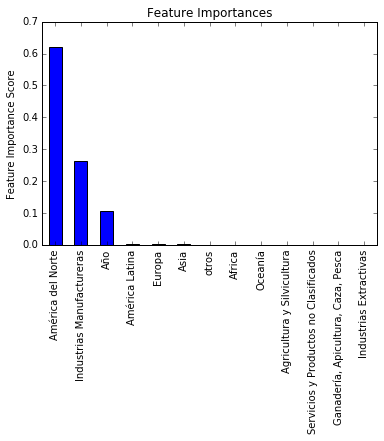

In [14]:
#crear modelo y mandar llamar funcion para modelado(random forest)
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=1 #para random forest funciono mejor el tipo 1
            
gbm0 = RandomForestRegressor(random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo1,tipo)

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Cross mean_squared_error : 1.565e+17
Cross error de la suma total de todas las predicciones : 0.01456
Cross error del monto de cada prediccion(35) : 0.115

Model Report
Test mean_squared_error : 1.772e+18
Test error de la suma total de todas las predicciones : 0.1104
Test error del monto de cada prediccion(35) : 0.2431


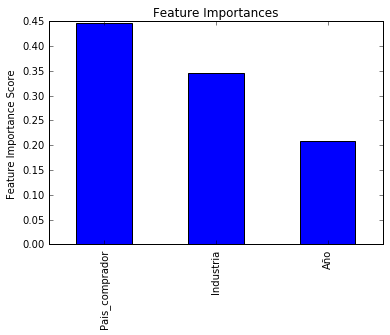

In [61]:
#crear modelo y mandar llamar funcion para modelado Gradient boosted trees:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #para boosted trees funcionó mejor el tipo 3
            
gbm0 = GradientBoostingRegressor(loss='ls',random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo3,tipo)

In [16]:
#funcion para modelar suppor vector regression

def support_vector_m(datos,tipo,pol_degree,c,g): 
    
    #dividir train,cross y tst:
    data_train=datos.query('Año<16').reset_index(drop=True) #desde año 1 hasta 15
    data_cross=datos.query('Año==16').reset_index(drop=True) #año 16
    data_test=datos.query('Año==17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,13:14]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,3:4]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
    
    #soft normalization:
    
    columns_names=list(X_train.columns) #obtener nombres de columnas(variables) para no perderlos
    scaler = preprocessing.StandardScaler().fit(X_train) #sacar medias y varianzas del training set para futura normalización
    
    X_train=scaler.transform(X_train) #normalizar training set
    X_train=pd.DataFrame(X_train,columns=columns_names) #convertir de array a DataFrame
    
    X_cross=scaler.transform(X_cross) #normalizar cross set
    X_cross=pd.DataFrame(X_cross,columns=columns_names) #convertir de array a DataFrame
    
    X_test=scaler.transform(X_test) #normalizar test set
    X_test=pd.DataFrame(X_test,columns=columns_names) #convertir de array a DataFram
    
    #entrenar modelos con training data set
    
    svr = SVR(kernel='linear',C=c).fit(X_train,Y_train) # "C" is the penalization for error term
    svr_poly = SVR(kernel='poly',degree=pol_degree,C=c).fit(X_train,Y_train) 
    svr_rbf = SVR(kernel='rbf',C=c,gamma=g).fit(X_train,Y_train) #gamma es el coeficiente del kernel/gamma es el ancho del guassiano                                                  
    
    # hacer predicciones de cross-validation data set
    
    Yg_linear=svr.predict(X_cross)
    Yg_poly=svr_poly.predict(X_cross)
    Yg_rbf=svr_rbf.predict(X_cross)
    
    #errores personalizados para Cross set linear:
    pd_dcross_predictions=pd.DataFrame(Yg_linear)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_linear)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set Polynomail:
    pd_dcross_predictions=pd.DataFrame(Yg_poly)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_poly)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set RBF:
    pd_dcross_predictions=pd.DataFrame(Yg_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_rbf)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t C: %1.3f' %c)
    #print('\t gamma: %1.3f' %g)
    print ("Cross mean_squared_error Linear kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_linear))
    print ("Cross error de la suma total de todas las predicciones Linear kernel: %.4g" %porcentaje_error_cross0)
    print ("Cross error del monto de cada prediccion(420) Linear kernel: %.4g" %porcentaje_error_abs_cross0)
    print ("Cross mean_squared_error Polynomial kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_poly))
    print ("Cross error de la suma total de todas las predicciones Polynomial kernel: %.4g" %porcentaje_error_cross1)
    print ("Cross error del monto de cada prediccion(420) Polynomial kernel: %.4g" %porcentaje_error_abs_cross1)
    print ("Cross mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_rbf))
    print ("Cross error de la suma total de todas las predicciones Radial Kernel: %.4g" %porcentaje_error_cross2)
    print ("Cross error del monto de cada prediccion(420) Radial Kernel: %.4g" %porcentaje_error_abs_cross2)
 
    # hacer predicciones de test data set::
    
    ########### predicciones con kernel lineal: #################
    
    #Predict test set:  
 
    resultados_lineal=svr.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lineal)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lineal)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Linear Kernel")
    print('\t C: %1.3f' %c)
    print ("Test mean_squared_error Linear Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lineal))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test0)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test0)
    
    ########### predicciones con kernel polinomial:#################
    
    #Predict test set:  
 
    resultados_poly=svr_poly.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_poly)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_poly)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Polynomial Kernel")
    print('\t C: %1.3f' %c)
    print ("Test mean_squared_error Polynomial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_poly))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test1)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test1)
    
    
    ########### predicciones con kernel Radial:#################
    
    #Predict test set: 
 
    resultados_rbf=svr_rbf.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_rbf)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Radial Kernel")
    print('\t C: %1.3f' %c)
    print ("Test mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_rbf))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test2)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test2)
    
    ###hacer data frame con los resultados de los 3 tipos de kernels:
    
    resu_cross=pd.DataFrame(np.zeros((len(Yg_linear),3)),columns=['Linear','Polynomial','Radial'])
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_rbf),3)),columns=['Linear','Polynomial','Radial'])
    
    resu_cross.loc[:,'Linear']=Yg_linear
    resu_cross.loc[:,'Polynomial']=Yg_poly
    resu_cross.loc[:,'Radial']=Yg_rbf
    
    resultados_fun.loc[:,'Linear']=resultados_lineal
    resultados_fun.loc[:,'Polynomial']=resultados_poly
    resultados_fun.loc[:,'Radial']=resultados_rbf
    
    return   X_train,Y_train

In [20]:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #para SVR funciono mejor (ninguno funcinó bien )
pol_degree=3
c=100
g='auto'
resu_cross,resultados_fun=support_vector_m(data_mof_tipo3,tipo,pol_degree,c,g)


Model Report
	 Grado polinomio 3.000
	 C: 100.000
Cross mean_squared_error Linear kernel: 3.687e+19
Cross error de la suma total de todas las predicciones Linear kernel: 0.9998
Cross error del monto de cada prediccion(420) Linear kernel: 0.9999
Cross mean_squared_error Polynomial kernel: 3.687e+19
Cross error de la suma total de todas las predicciones Polynomial kernel: 0.9998
Cross error del monto de cada prediccion(420) Polynomial kernel: 0.9999
Cross mean_squared_error Radial Kernel: 3.687e+19
Cross error de la suma total de todas las predicciones Radial Kernel: 0.9998
Cross error del monto de cada prediccion(420) Radial Kernel: 0.9999

Model Report Linear Kernel
	 C: 100.000
Test mean_squared_error Linear Kernel: 3.319e+19
Test error de la suma total de todas las predicciones : 0.9998
Test error del monto de cada prediccion(35) : 0.9999

Model Report Polynomial Kernel
	 C: 100.000
Test mean_squared_error Polynomial Kernel: 3.319e+19
Test error de la suma total de todas las predicc

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\svm\base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\svm\base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\svm\base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


In [22]:
#funcion para modelar regresiones con penalización L1(lasso) y L2(ridge):

def regresiones(datos,tipo,Alpha):
    
    #dividir train,cross y tst:
    data_train=datos.query('Año<16').reset_index(drop=True) #desde año 1 hasta 15
    data_cross=datos.query('Año==16').reset_index(drop=True) #año 16
    data_test=datos.query('Año==17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,13:14]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,3:4]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    #entrenar modelos con training data set
    Lasso_reg= Lasso(alpha=Alpha,normalize=True).fit(X_train,Y_train)#alpha :Constant that multiplies the L1 term. Defaults to 1.0
    Ridge_reg= Ridge(alpha=Alpha,normalize=True,solver='auto').fit(X_train,Y_train)#alpha :Regularization strength; must be a positive float. 
    #Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
        
    # hacer predicciones de cross-validation data set
    
    Yg_lasso=Lasso_reg.predict(X_cross)
    Yg_ridge=Ridge_reg.predict(X_cross)
    
    #errores personalizados para Cross set Lasso:
    pd_dcross_predictions=pd.DataFrame(Yg_lasso)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_lasso)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set Ridge:
    pd_dcross_predictions=pd.DataFrame(Yg_ridge)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_ridge)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    
    print('\t Alpha %1.3f' %Alpha)
    print ("Cross R2(coefficient of determination) Lasso : %.4g" % r2_score(Y_cross.values,Yg_lasso))
    print ("Cross mean square error Lasso: %.4g" % mean_squared_error(Y_cross.values,Yg_lasso))
    print ("Cross error de la suma total de todas las predicciones Lasso: %.4g" %porcentaje_error_cross0)
    print ("Cross error del monto de cada prediccion(35) Lasso: %.4g" %porcentaje_error_abs_cross0)
    print ("Cross R2(coefficient of determination) Ridge: %.4g" % r2_score(Y_cross.values,Yg_ridge))
    print ("Cross mean square error Ridge: %.4g" % mean_squared_error(Y_cross.values,Yg_ridge))
    print ("Cross error de la suma total de todas las predicciones Ridge: %.4g" %porcentaje_error_cross1)
    print ("Cross error del monto de cada prediccion(35) Ridge: %.4g" %porcentaje_error_abs_cross1)
 
    # hacer predicciones de test data set::
    
    ########### predicciones con regresion Lasso : #################
    
    #Predict test set:  
 
    resultados_lasso=Lasso_reg.predict(X_test)
    
    #errores personalizados para test set Lasso:
    pd_dcross_predictions=pd.DataFrame(resultados_lasso)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lasso)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Lasso")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test R2(coefficient of determination) Lasso : %.4g" % r2_score(Y_test.values,resultados_lasso))
    print ("Test mean_squared_error Lasso: %.4g" % mean_squared_error(Y_test.values,resultados_lasso))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test0)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test0)
    
    ########### predicciones con regresion Ridge:#################
    
    #Predict test set:  
 
    resultados_ridge=Ridge_reg.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_ridge)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_ridge)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Ridge")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test R2(coefficient of determination) Ridge : %.4g" % r2_score(Y_test.values,resultados_ridge))
    print ("Test mean_squared_error Ridge: %.4g" % mean_squared_error(Y_test.values,resultados_ridge))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test1)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test1)
                
    ###hacer data frame con los resultados de los 2 tipos de penalización:
    
    resu_cross=pd.DataFrame(np.zeros((len(Yg_lasso),2)),columns=['Lasso','Ridge'])
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_lasso),2)),columns=['Lasso','Ridge'])
    
    resu_cross.loc[:,'Lasso']=Yg_lasso
    resu_cross.loc[:,'Ridge']=Yg_ridge
    
    resultados_fun.loc[:,'Lasso']=resultados_lasso
    resultados_fun.loc[:,'Ridge']=resultados_ridge
    
    return   resu_cross,resultados_fun

In [35]:
#mandar llamar funcion para modelar regresiones:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=1 #no tuvieron buenos resultados

#for Alpha in range(1,11):
#    regresiones(data_mof_tipo1,tipo,Alpha)
       
Alpha=10
resu_cross,resultados_fun=regresiones(data_mof_tipo1,tipo,Alpha) 

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)



Model Report
	 Alpha 1.000
Cross R2(coefficient of determination) Lasso : 0.2921
Cross mean square error Lasso: 2.489e+19
Cross error de la suma total de todas las predicciones Lasso: 0.009337
Cross error del monto de cada prediccion(35) Lasso: 1.314
Cross R2(coefficient of determination) Ridge: 0.187
Cross mean square error Ridge: 2.859e+19
Cross error de la suma total de todas las predicciones Ridge: 0.214
Cross error del monto de cada prediccion(35) Ridge: 1.169

Model Report Lasso
	 alpha: 1.000
Test R2(coefficient of determination) Lasso : 0.3283
Test mean_squared_error Lasso: 2.089e+19
Test error de la suma total de todas las predicciones : 0.05948
Test error del monto de cada prediccion(35) : 1.229

Model Report Ridge
	 alpha: 1.000
Test R2(coefficient of determination) Ridge : 0.2086
Test mean_squared_error Ridge: 2.461e+19
Test error de la suma total de todas las predicciones : 0.2673
Test error del monto de cada prediccion(35) : 1.144

Model Report
	 Alpha 2.000
Cross R2(coe

In [39]:
#funcion para modelar Regresion Kernel Ridge:
def kernel_ridge(datos,tipo,Alpha,pol_degree,g): 
    
    #dividir train,cross y tst:
    data_train=datos.query('Año<16').reset_index(drop=True) #desde año 1 hasta 15
    data_cross=datos.query('Año==16').reset_index(drop=True) #año 16
    data_test=datos.query('Año==17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,13:14]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,3:4]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
    
    #soft normalization:
    
    columns_names=list(X_train.columns) #obtener nombres de columnas(variables) para no perderlos
    scaler = preprocessing.StandardScaler().fit(X_train) #sacar medias y varianzas del training set para futura normalización
    
    X_train=scaler.transform(X_train) #normalizar training set
    X_train=pd.DataFrame(X_train,columns=columns_names) #convertir de array a DataFrame
    
    X_cross=scaler.transform(X_cross) #normalizar cross set
    X_cross=pd.DataFrame(X_cross,columns=columns_names) #convertir de array a DataFrame
    
    X_test=scaler.transform(X_test) #normalizar test set
    X_test=pd.DataFrame(X_test,columns=columns_names) #convertir de array a DataFram
    
    #entrenar modelos con training data set
    
    Kridge_linear = KernelRidge(kernel='linear',alpha=Alpha).fit(X_train,Y_train)#Small positive values of alpha improve the conditioning 
    #of the problem and reduce the variance of the estimates
    Kridge_poly = KernelRidge(kernel='poly',degree=pol_degree,alpha=Alpha,gamma=g).fit(X_train,Y_train) 
    Kridge_rbf = KernelRidge(kernel='rbf',alpha=Alpha,gamma=g).fit(X_train,Y_train) #gamma es el coeficiente del kernel/gamma es el ancho del guassiano                                                  
    Kridge_laplacian= KernelRidge(kernel='laplacian',alpha=Alpha,gamma=g).fit(X_train,Y_train) # "C" is the penalization for error term
    # hacer predicciones de cross-validation data set
    
    Yg_linear=Kridge_linear.predict(X_cross)
    Yg_poly=Kridge_poly.predict(X_cross)
    Yg_rbf=Kridge_rbf.predict(X_cross)
    Yg_lapla=Kridge_laplacian.predict(X_cross)
    
    #errores personalizados para Cross set Linear:
    pd_dcross_predictions=pd.DataFrame(Yg_linear)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_linear)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set Polynomial:
    pd_dcross_predictions=pd.DataFrame(Yg_poly)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_poly)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set RBF:
    pd_dcross_predictions=pd.DataFrame(Yg_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_rbf)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set Laplacian:
    pd_dcross_predictions=pd.DataFrame(Yg_lapla)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_lapla)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross3=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross3=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Cross mean_squared_error Linear kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_linear))
    print ("Cross R2 Linear kernel: %.4g" % r2_score(Y_cross.values,Yg_linear))
    print ("Cross error de la suma total de todas las predicciones Linear kernel: %.4g" %porcentaje_error_cross0)
    print ("Cross error del monto de cada prediccion(35) Linear kernel: %.4g" %porcentaje_error_abs_cross0)
    print ("Cross mean_squared_error Polynomial kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_poly))
    print ("Cross R2 Polynomial kernel: %.4g" % r2_score(Y_cross.values,Yg_poly))
    print ("Cross error de la suma total de todas las predicciones Polynomial kernel: %.4g" %porcentaje_error_cross1)
    print ("Cross error del monto de cada prediccion(35) Polynomial kernel: %.4g" %porcentaje_error_abs_cross1)
    print ("Cross mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_rbf))
    print ("Cross R2 Radial Kernel: %.4g" % r2_score(Y_cross.values,Yg_rbf))
    print ("Cross error de la suma total de todas las predicciones Radial kernel: %.4g" %porcentaje_error_cross2)
    print ("Cross error del monto de cada prediccion(35) Radial kernel: %.4g" %porcentaje_error_abs_cross2)
    print ("Cross mean_squared_error Laplacian Kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_lapla))
    print ("Cross R2 Laplacian Kernel: %.4g" % r2_score(Y_cross.values,Yg_lapla))
    print ("Cross error de la suma total de todas las predicciones Laplacian kernel: %.4g" %porcentaje_error_cross3)
    print ("Cross error del monto de cada prediccion(35) Laplacian kernel: %.4g" %porcentaje_error_abs_cross3)
 
    # hacer predicciones de test data set::
    
    ########### predicciones con kernel lineal: #################
    
    #Predict test set:  
 
    resultados_lineal=Kridge_linear.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lineal)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lineal)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Linear Kernel")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test mean_squared_error Linear Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lineal))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test0)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test0)
    
    ########### predicciones con kernel polinomial:#################
    
    #Predict test set:  
 
    resultados_poly=Kridge_poly.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_poly)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_poly)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Polynomial Kernel")
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t Alpha: %1.3f' %Alpha)
    print('\t Gamma: %1.3f' %g)
    print ("Test mean_squared_error Polynomial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_poly))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test1)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test1)
     
    
    ########### predicciones con kernel Radial:#################
    
    #Predict test set: 
 
    resultados_rbf=Kridge_rbf.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_rbf)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Radial Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_rbf))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test2)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test2)
     
    ########### predicciones con kernel Laplacian:#################
    
    #Predict test set: 
 
    resultados_lapla=Kridge_laplacian.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lapla)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lapla)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test3=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test3=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Laplacian Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Laplacian Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lapla))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test3)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test3)
            
    ###hacer data frame con los resultados de los 4 tipos de kernels:
    
    resu_cross=pd.DataFrame(np.zeros((len(Yg_linear),4)),columns=['Linear','Polynomial','Radial','Laplacian'])
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_rbf),4)),columns=['Linear','Polynomial','Radial','Laplacian'])
    
    resu_cross.loc[:,'Linear']=Yg_linear
    resu_cross.loc[:,'Polynomial']=Yg_poly
    resu_cross.loc[:,'Radial']=Yg_rbf
    resu_cross.loc[:,'Laplacian']=Yg_lapla
    
    resultados_fun.loc[:,'Linear']=resultados_lineal
    resultados_fun.loc[:,'Polynomial']=resultados_poly
    resultados_fun.loc[:,'Radial']=resultados_rbf
    resultados_fun.loc[:,'Laplacian']=resultados_lapla
    
    return   resu_cross,resultados_fun

In [50]:
#mandar llamar funcion para modelado con regresión Kernel Ridge:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

#definir funciones para pasos :
def frange(x, y, jump):
  while x <= y:
    yield x
    x *= jump
    
def frange2(x, y, jump):
  while x >= y:
    yield x
    x /= jump
    
tipo=3 #el mejor fue el tipo 3
for pol_degree in range(1,4):
    for Alpha in frange(1,10,2):
        for g in frange2(2,.002,10):
            kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)
        
#Alpha=1
#pol_degree=3
#g=.002
#resu_cross,resultados_fun=kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)


Model Report
	 Grado polinomio 1.000
	 Alpha: 1.000
	 gamma: 2.000
Cross mean_squared_error Linear kernel: 2.55e+19
Cross R2 Linear kernel: 0.2748
Cross error de la suma total de todas las predicciones Linear kernel: 0.5915
Cross error del monto de cada prediccion(420) Linear kernel: 1.49
Cross mean_squared_error Polynomial kernel: 2.49e+19
Cross R2 Polynomial kernel: 0.2919
Cross error de la suma total de todas las predicciones Polynomial kernel: 0.01083
Cross error del monto de cada prediccion(420) Polynomial kernel: 1.312
Cross mean_squared_error Radial Kernel: 1.024e+19
Cross R2 Radial Kernel: 0.7087
Cross error de la suma total de todas las predicciones Radial kernel: 0.4608
Cross error del monto de cada prediccion(420) Radial kernel: 0.554
Cross mean_squared_error Laplacian Kernel: 1.376e+19
Cross R2 Laplacian Kernel: 0.6088
Cross error de la suma total de todas las predicciones Laplacian kernel: 0.559
Cross error del monto de cada prediccion(420) Laplacian kernel: 0.5987

Model

In [56]:
#kernel Ridge con pol grado 6:
tipo=3 #el mejor fue el tipo 3
for pol_degree in range(6,7):
    for Alpha in frange(1,10,2):
        for g in frange2(2,.002,10):
            kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)


Model Report
	 Grado polinomio 6.000
	 Alpha: 1.000
	 gamma: 2.000
Cross mean_squared_error Linear kernel: 2.55e+19
Cross R2 Linear kernel: 0.2748
Cross error de la suma total de todas las predicciones Linear kernel: 0.5915
Cross error del monto de cada prediccion(420) Linear kernel: 1.49
Cross mean_squared_error Polynomial kernel: 9.274e+16
Cross R2 Polynomial kernel: 0.9974
Cross error de la suma total de todas las predicciones Polynomial kernel: 0.08385
Cross error del monto de cada prediccion(420) Polynomial kernel: 0.2075
Cross mean_squared_error Radial Kernel: 1.024e+19
Cross R2 Radial Kernel: 0.7087
Cross error de la suma total de todas las predicciones Radial kernel: 0.4608
Cross error del monto de cada prediccion(420) Radial kernel: 0.554
Cross mean_squared_error Laplacian Kernel: 1.376e+19
Cross R2 Laplacian Kernel: 0.6088
Cross error de la suma total de todas las predicciones Laplacian kernel: 0.559
Cross error del monto de cada prediccion(420) Laplacian kernel: 0.5987

Mod

In [1]:
#mandar llamar funcion para modelado con regresión Kernel Ridge:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3
tipo=3
Alpha=1
pol_degree=5
g=.2
resu_cross,resultados_fun=kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)

NameError: name 'kernel_ridge' is not defined

In [62]:
#crear data frame "variables de entrada" 
variables_entrada=datos.groupby(['Pais_comprador','Industria','Año'],as_index=False,sort=False)['Monto'].sum()
variables_entrada=variables_entrada.query('Año==17').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
variables_entrada=variables_entrada.ix[:,variables_entrada.columns!='Año']
dataframe_final=variables_entrada.join(resultados_fun)
dataframe_final

,Pais_comprador,Industria,Monto,Prediccion
0,América Latina,Industrias Manufactureras,2.397102e+09,3.355175e+09
1,América Latina,Industrias Extractivas,1.418405e+07,1.182048e+07
2,América Latina,Agricultura y Silvicultura,6.301164e+07,1.029004e+08
3,América Latina,Servicios y Productos no Clasificados,2.123811e+07,2.399239e+07
4,América Latina,"Ganadería, Apicultura, Caza, Pesca",2.599100e+04,1.182048e+07
5,Asia,Industrias Manufactureras,2.346391e+09,2.470383e+09
6,Asia,Industrias Extractivas,6.842395e+06,5.224196e+06
7,Asia,Agricultura y Silvicultura,6.796650e+07,6.930465e+07
8,Asia,Servicios y Productos no Clasificados,2.547709e+07,1.739611e+07
9,Asia,"Ganadería, Apicultura, Caza, Pesca",1.700000e+02,5.224196e+06


In [30]:
#funcion para errores por segmentos(pais,industria,año,mes)

def errores(data,col,pais,industria,s_pais=True,s_industria=True):
    
    # totales:
    
    diferencias_abs=pd.DataFrame(abs(data.Monto.values-data.iloc[:,col].values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(data.iloc[:,col])
    sum_reales=sum(data.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
    
    d={'Total_Real':sum_reales,'Total_Predicciones':sum_predicciones}
    pd_plot=pd.DataFrame(d,index=['Total'])
        
    titulo='Montos totales anuales'
    print("Monto total Anual:")
    print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
    print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
    print(pd_plot.plot(title=titulo,kind='bar',figsize=(14,8)))
    print(pd_plot)
    
    if s_pais & s_industria:
        
        query=data[(data.Pais_comprador==pais[0]) & (data.Industria==industria[0])].reset_index(drop=True)

        diferencias_abs=pd.DataFrame(abs(query.Monto.values-query.iloc[:,col].values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(query.iloc[:,col])
        sum_reales=sum(query.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        titulo=pais[0]+'-'+industria[0]+'--'+'Anual'
        print(pais,industria,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        print(query.plot(title=titulo,kind='bar',figsize=(14,8)))
        print(query)
                     
    if s_pais:
        
        query=data[(data.Pais_comprador==pais[0])].reset_index(drop=True)

        diferencias_abs=pd.DataFrame(abs(query.Monto.values-query.iloc[:,col].values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(query.iloc[:,col])
        sum_reales=sum(query.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        titulo=pais[0]+'--'+'Anual'
        query=query.set_index('Industria')
        print(pais,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        print(query.plot(title=titulo,kind='bar',figsize=(14,8)))
        print(query)
        
    if s_industria:
        
        query=data[(data.Industria==industria[0])].reset_index(drop=True)

        diferencias_abs=pd.DataFrame(abs(query.Monto.values-query.iloc[:,col].values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(query.iloc[:,col])
        sum_reales=sum(query.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        titulo=industria[0]+'--'+'Anual'
        query=query.set_index('Pais_comprador')
        print(industria,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        print(query.plot(title=titulo,kind='bar',figsize=(14,8)))
        print(query)     

Monto total Anual:
Error de la suma total de predicciones: 0.03532
Error de cada prediccion : 0.3231
Axes(0.125,0.125;0.775x0.775)
       Total_Predicciones    Total_Real
Total        4.887044e+10  5.065973e+10
['América del Norte'] ['Industrias Manufactureras'] :
Error de la suma total de predicciones: 0.1322
Error de cada prediccion : 0.1322
Axes(0.125,0.125;0.775x0.775)
      Pais_comprador                  Industria         Monto        Linear  \
0  América del Norte  Industrias Manufactureras  3.211777e+10  6.985479e+09   

     Polynomial        Radial     Laplacian  
0  3.636225e+10  2.169587e+10  1.927944e+10  
['América del Norte'] :
Error de la suma total de predicciones: 0.1051
Error de cada prediccion : 0.1844
Axes(0.125,0.125;0.775x0.775)
                                          Pais_comprador         Monto  \
Industria                                                                
Industrias Manufactureras              América del Norte  3.211777e+10   
Industrias Extra

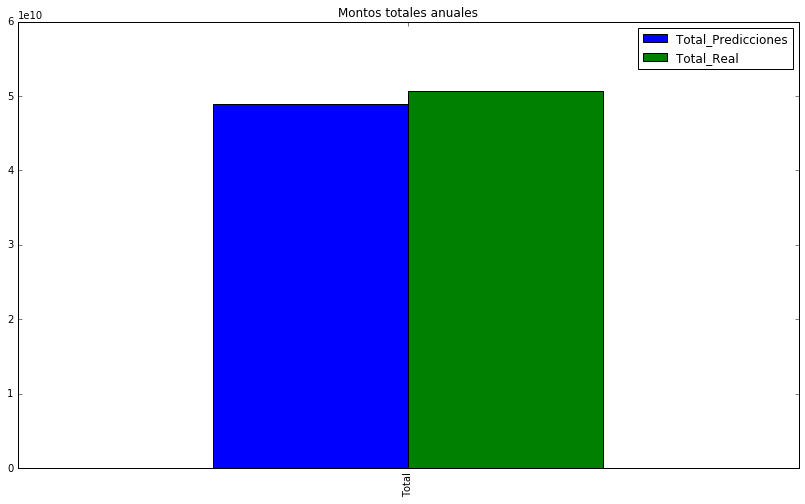

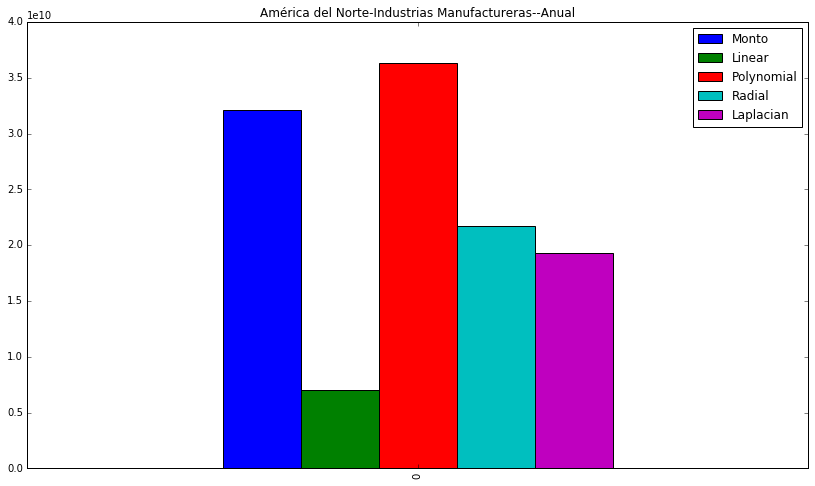

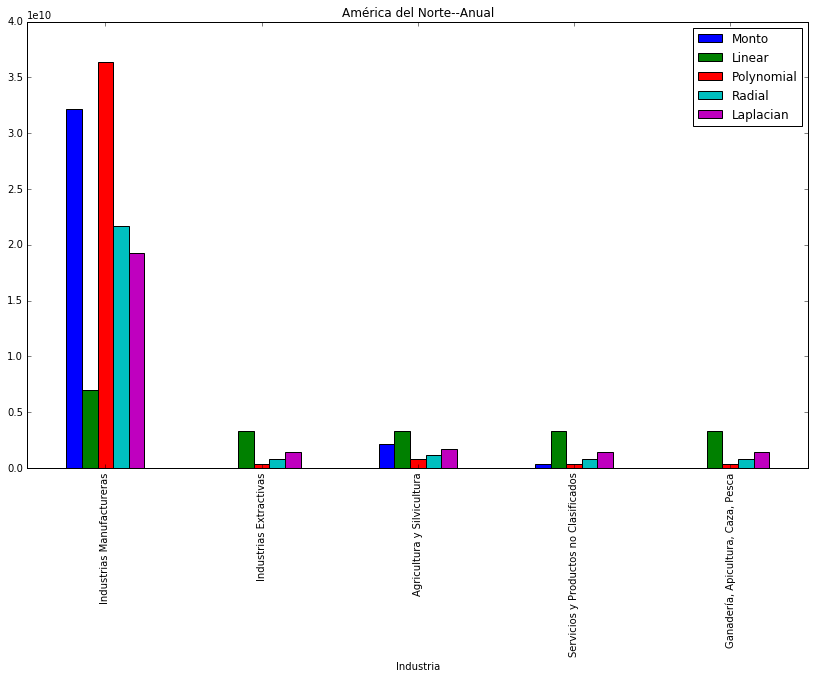

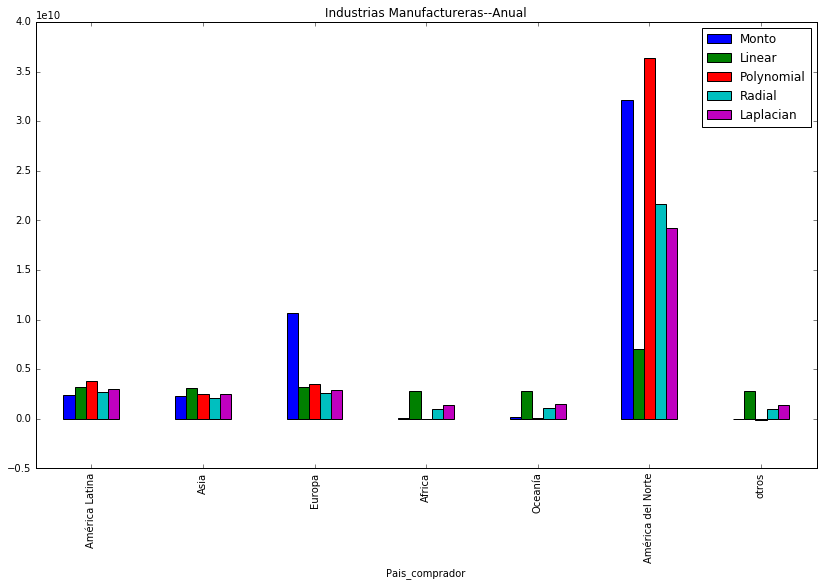

In [60]:
#mandar llamar funcion de errores por segmentos

#lista paises: América Latina,Asia,Europa,Africa,Oceanía,América del Norte,otros
#lista industrias: Industrias Manufactureras//Agricultura y Silvicultura//Servicios y Productos no Clasificados 
                ## Industrias Extractivas//Ganadería, Apicultura, Caza, Pesca
col=4
pais=['América del Norte']
industria=['Industrias Manufactureras']

errores(dataframe_final,col,pais,industria)